In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Colab Notebooks/CS 520'

/content/drive/MyDrive/Colab Notebooks/CS 520


In [4]:
ls

adult.csv          boston.csv              Untitled0.ipynb
Assignment1.ipynb  california_housing.csv


In [5]:
import pandas
import matplotlib.pyplot as plt

In [6]:
df = pandas.read_csv('california_housing.csv')

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Median House Value Histogram

<Axes: title={'center': 'Median House Value'}, ylabel='Frequency'>

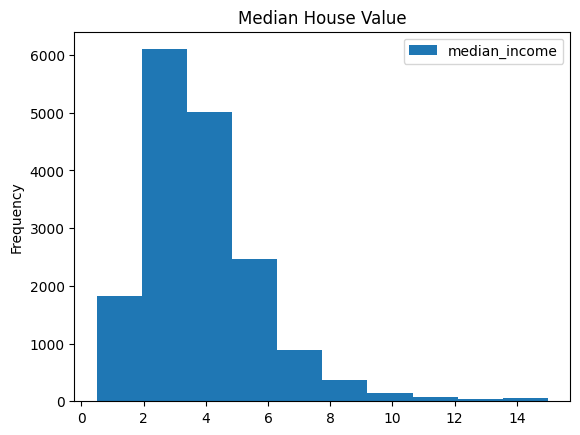

In [8]:
df.plot(kind='hist', x='median_house_value', y="median_income", title='Median House Value')

Scatter Plots of Features x Target

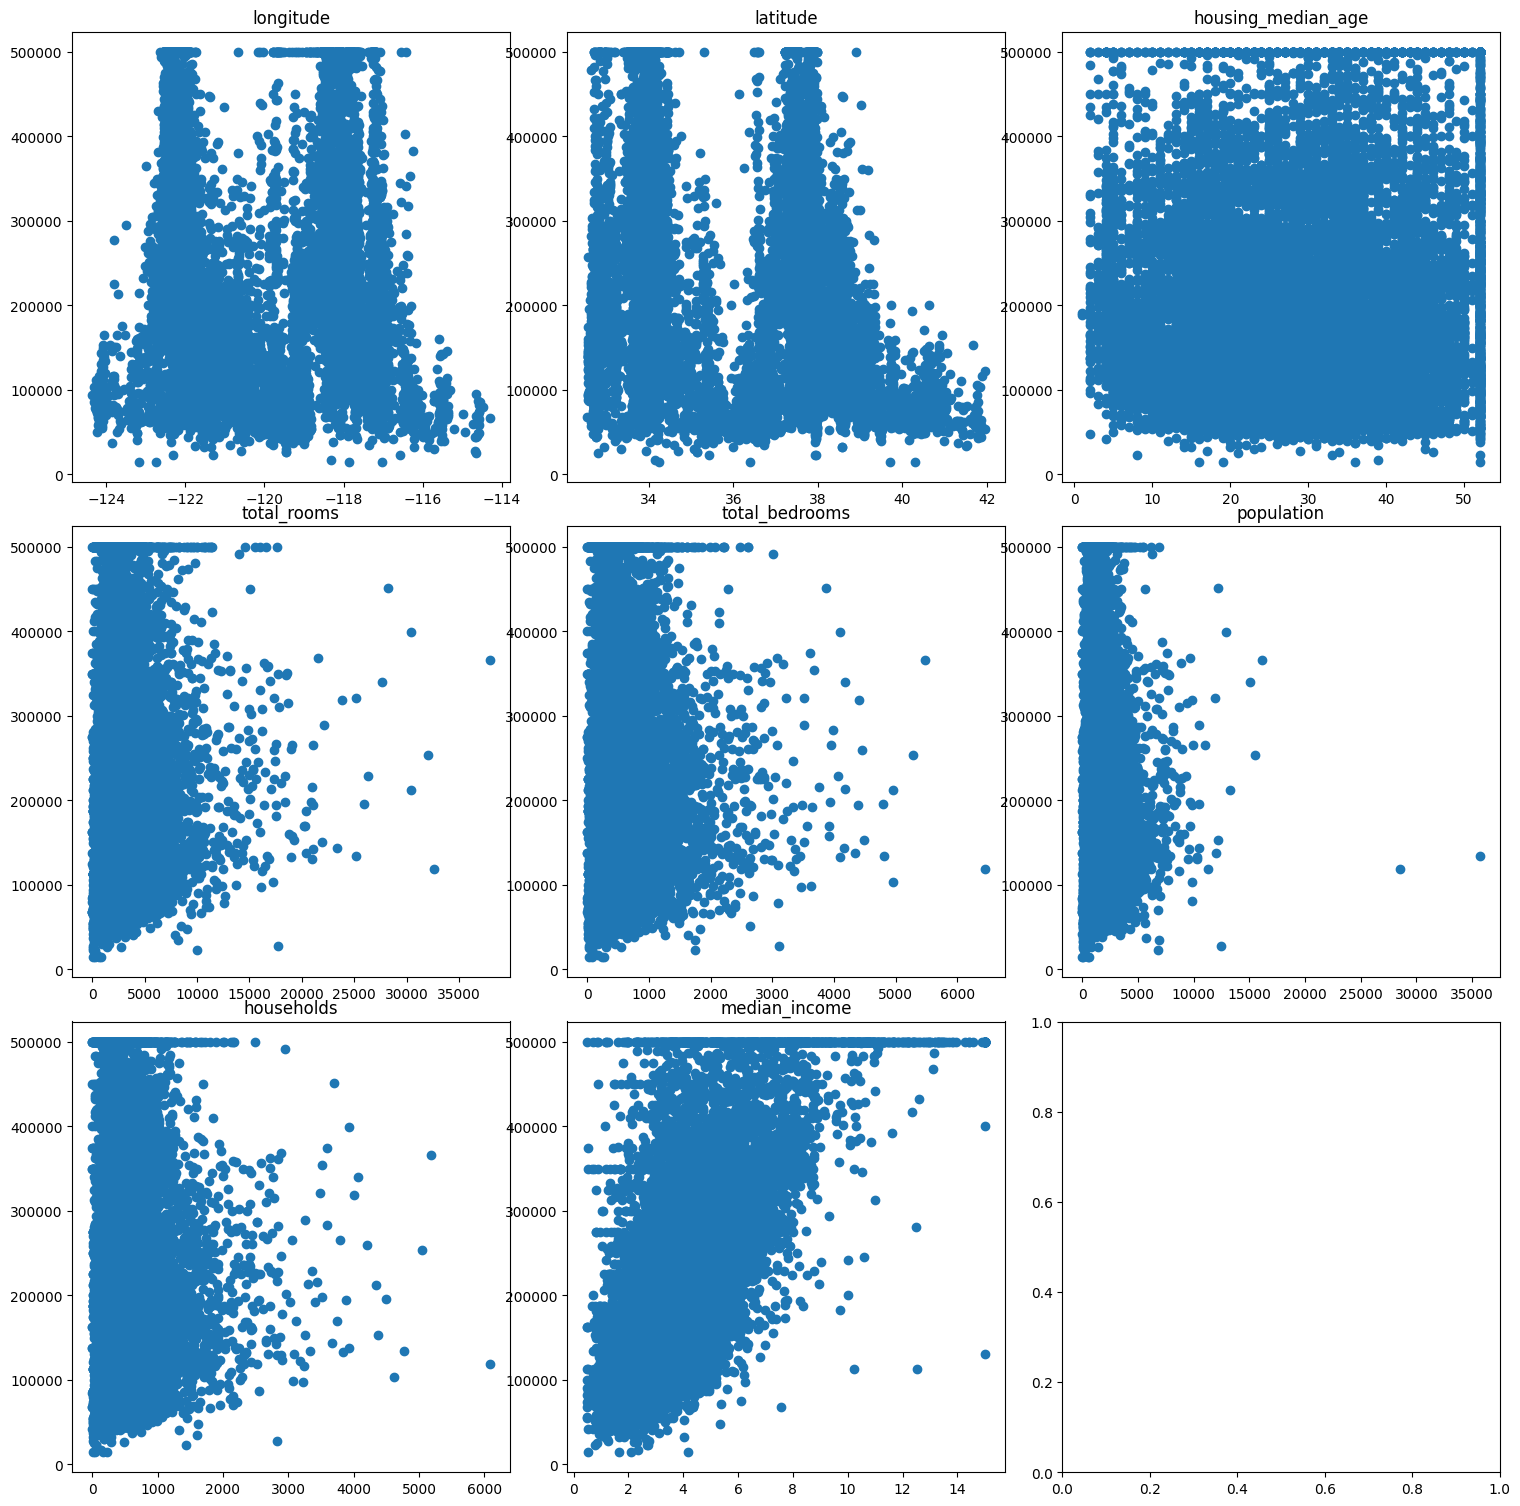

In [9]:
columns = df.columns
fig, axs = plt.subplots(3,3, figsize=(15, 15))
fig.tight_layout()

X=df[columns[:-1]]
y=df[columns[-1]]

for index, column in enumerate(columns[:-1]):
  axs[index//3, index%3].scatter(X[column], y)
  axs[index//3, index%3].set_title(column)

The charts above show that there are some major outliers in the dataset. It is hard to see the data in some of these charts because the scale is so large to accomodate the outliers. For example, most of the population data is under 10,000, but there are a few populations that are very high, getting up to about 35,000. This  makes it hard to see correlations in the data because the charts are so dense in some areas and sparse in others. However, it generally appears that as household median income increases, median house value also increases. This is the only solid correlation to be found in these charts so far.

Linear Regression

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg=linear_reg.fit(X_train, y_train)

In [19]:
from sklearn.metrics import mean_squared_error
predict_train=linear_reg.predict(X_train)
predict_test=linear_reg.predict(X_test)
mse = mean_squared_error(y_train, predict_train, squared=False), mean_squared_error(y_test, predict_test, squared=False)
print("Mean Squared Error: ", mse)

print('Training performance')
print(linear_reg.score(X_train, y_train))
print("Testing performance")
print(linear_reg.score(X_test, y_test))

Mean Squared Error:  (69825.90215906859, 68078.32552452665)
Training performance
0.6352694644505288
Testing performance
0.6636396350243758


In [13]:
predict_test[:5]

array([143770.39502964, 398615.57056491,  86341.10306742, 148534.35353344,
       147202.298086  ])

Polynomial Regression, degree=2

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_train=PolynomialFeatures(degree=2, include_bias=False)
poly_train=poly_train.fit(X_train)
X_train1=poly_train.transform(X_train)
X_test1=poly_train.transform(X_test)

In [35]:
linear=LinearRegression()
linear.fit(X_train1, y_train)
print("Performance on new training set: ", linear.score(X_train1, y_train))
print("Performance on new testing set: ", linear.score(X_test1, y_test))

linear_predict_train=linear.predict(X_train1)
linear_predict_test=linear.predict(X_test1)
print("Root of Mean squared error for training set: ")
print(mean_squared_error(y_train, linear_predict_train,squared=False))

print("Root of Mean squared error for testing set: ")
print(mean_squared_error(y_test, linear_predict_test,squared=False))

Performance on new training set:  0.7023278314526336
Performance on new testing set:  0.7216113427846709
Root of Mean squared error for training set: 
63081.15100329655
Root of Mean squared error for testing set: 
61934.44151410047


In [26]:
linear_predict_test[:5]

array([138548.11830846, 407060.14546274,  90637.25589783, 135439.51594343,
       133938.2631616 ])

degree=3

In [36]:
poly_train=PolynomialFeatures(degree=3, include_bias=False)
poly_train=poly_train.fit(X_train)
X_train2=poly_train.transform(X_train)
X_test2=poly_train.transform(X_test)

In [37]:
linear=LinearRegression()
linear.fit(X_train2, y_train)
print("Performance on new training set: ", linear.score(X_train2, y_train))
print("Performance on new testing set: ", linear.score(X_test2, y_test))

linear_predict_train=linear.predict(X_train2)
linear_predict_test=linear.predict(X_test2)
print("Root of Mean squared error for training set: ")
print(mean_squared_error(y_train, linear_predict_train,squared=False))

print("Root of Mean squared error for testing set: ")
print(mean_squared_error(y_test, linear_predict_test,squared=False))

Performance on new training set:  0.7457238820945314
Performance on new testing set:  0.7480326348771051
Root of Mean squared error for training set: 
58301.976698958606
Root of Mean squared error for testing set: 
58922.152650179545


In [30]:
linear_predict_test[:5]

array([131256.98985757, 442062.78943653,  71914.68159206, 136046.86986761,
       126652.71935906])

Analysis:
The RMSE from decreased from the original linear regression to the polynomial regression with degree=2. It then was further decreased when the degree was increased to 4. This suggests that the model is becoming more accurate with the new manipulations made to the model. The performance score also increases each time the model is changed, which also supports the theory that the accuracy is improving.

Degree=4

In [38]:
poly_train=PolynomialFeatures(degree=4, include_bias=False)
poly_train=poly_train.fit(X_train)
X_train3=poly_train.transform(X_train)
X_test3=poly_train.transform(X_test)

In [39]:
linear=LinearRegression()
linear.fit(X_train3, y_train)
print("Performance on new training set: ", linear.score(X_train3, y_train))
print("Performance on new testing set: ", linear.score(X_test3, y_test))

linear_predict_train=linear.predict(X_train3)
linear_predict_test=linear.predict(X_test3)
print("Root of Mean squared error for training set: ")
print(mean_squared_error(y_train, linear_predict_train,squared=False))

print("Root of Mean squared error for testing set: ")
print(mean_squared_error(y_test, linear_predict_test,squared=False))

Performance on new training set:  0.3177883149662335
Performance on new testing set:  -2.8351874013168463
Root of Mean squared error for training set: 
95497.07512931943
Root of Mean squared error for testing set: 
229879.24000219422


In [40]:
linear_predict_test[:5]

array([153829.34986756, 428542.00832254,  47074.52592373, 126309.19370608,
       -10464.97415923])

L2 Regularization

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train3)

X_train3_scaled=scaler.transform(X_train3)
X_test3_scaled=scaler.transform(X_test3)

alpha=0.01

In [50]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=.01)
ridge=ridge.fit(X_train3_scaled, y_train)

print("Ridge model performance on training set: ")
print(ridge.score(X_train3_scaled, y_train))

print("Ridge model performance on testing set: ")
print(ridge.score(X_test3_scaled, y_test))

predict_train=ridge.predict(X_train3_scaled)
predict_test=ridge.predict(X_test3_scaled)
mse = mean_squared_error(y_train, predict_train, squared=False), mean_squared_error(y_test, predict_test, squared=False)
print("Mean Squared Error: ", mse)

Ridge model performance on training set: 
0.760421556335044
Ridge model performance on testing set: 
0.7469271705993883
Mean Squared Error:  (56591.9114664684, 59051.266687459705)


alpha=0.1

In [55]:
ridge=Ridge(alpha=.1)
ridge=ridge.fit(X_train3_scaled, y_train)
print("Ridge model performance on training set: ")
print(ridge.score(X_train3_scaled, y_train))

print("Ridge model performance on testing set: ")
print(ridge.score(X_test3_scaled, y_test))

predict_train=ridge.predict(X_train3_scaled)
predict_test=ridge.predict(X_test3_scaled)
mse = mean_squared_error(y_train, predict_train, squared=False), mean_squared_error(y_test, predict_test, squared=False)
print("Mean Squared Error: ", mse)

print("First 5 test predictions: ", predict_test[:5])

Ridge model performance on training set: 
0.7545527277722136
Ridge model performance on testing set: 
0.7547250386755794
Mean Squared Error:  (57280.86904985482, 58134.38274346677)
First 5 test predictions:  [129340.92108627 435828.84838717  80900.56120962 134684.66892216
 137942.21840772]


alpha=1

In [52]:
ridge=Ridge(alpha=1)
ridge=ridge.fit(X_train3_scaled, y_train)
print("Ridge model performance on training set: ")
print(ridge.score(X_train3_scaled, y_train))

print("Ridge model performance on testing set: ")
print(ridge.score(X_test3_scaled, y_test))

predict_train=ridge.predict(X_train3_scaled)
predict_test=ridge.predict(X_test3_scaled)
mse = mean_squared_error(y_train, predict_train, squared=False), mean_squared_error(y_test, predict_test, squared=False)
print("Mean Squared Error: ", mse)

Ridge model performance on training set: 
0.7452255113618291
Ridge model performance on testing set: 
0.748748727660183
Mean Squared Error:  (58359.08346910882, 58838.36451825357)




*   The best alpha in this case is 0.1.
*   It is important in machine learning to analyze performance according to the accuracy on the testing set vs. the training set. If the training set's accuracy is much higher than the testing set, this suggests that the model is being overfitted. This can be observed in the 0.01 alpha code. There is a 2% difference between the testing and training sets, meaning that the training suggests the model has a 76% accuracy, but the testing set shows only a 74% accuracy.

*   The alpha=1 set has closer training and testing performance scores, but they also show only about a 74% accuracy.
*   The alpha=0.1 set is the best because the model is not overfitted and the accuracy is about 75%.